In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Dataset', 
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Dataset', 
                                             target_size = (128, 128), 
                                        batch_size = 3, class_mode = 'categorical')


Found 271 images belonging to 5 classes.
Found 271 images belonging to 5 classes.


In [ ]:
labels = (training_set.class_indices)
print(labels)


{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Healthy': 2, 'Leaf smut': 3, 'None': 4}


In [ ]:
classifier.fit(training_set,
                         steps_per_epoch = 20,
                         epochs = 20,
                         validation_data=valid_set

                         )

Epoch 1/20
20/20 [==============================] - ETA: 0s - batch: 9.5000 - size: 6.0000 - loss: 1.3275 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20/20 [==============================] - 32s 1s/step - batch: 9.5000 - size: 6.0000 - loss: 1.3275 - accuracy: 0.5000 - val_loss: 0.8505 - val_accuracy: 0.6716
Epoch 2/20
20/20 [==============================] - 8s 414ms/step - batch: 9.5000 - size: 5.7500 - loss: 0.8359 - accuracy: 0.6435 - val_loss: 0.6686 - val_accuracy: 0.7196
Epoch 3/20
20/20 [==============================] - 8s 404ms/step - batch: 9.5000 - size: 6.0000 - loss: 0.6884 - accuracy: 0.7417 - val_loss: 0.6953 - val_accuracy: 0.7011
Epoch 4/20
20/20 [==============================] - 8s 395ms/step - batch: 9.5000 - size: 6.0000 - loss: 0.7408 - accuracy: 0.6667 - val_loss: 0.6691 - val_accuracy: 0.6863
Epoch 5/20
20/20 [==============================] - 8s 411ms/step - batch: 9.5000 - size: 5.7500 - loss: 0.6277 - accuracy: 0.6783 - val_loss: 0.6128 - val_accuracy: 0.7122
Epoch 6/20
20/20 [==============================] - 7s 364ms/step - batch: 9.5000 - size: 5.7500 - loss: 0.6512 - accuracy: 0.7217 - val_loss: 0.590

In [ ]:
classifier_json=classifier.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)

    classifier.save_weights("/content/drive/MyDrive/final year projects/my_model_weights3.h5")
    classifier.save("/content/drive/MyDrive/final year projects/model6.h5")
    print("Saved model to disk")


Saved model to disk


In [ ]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/Paddy_Dtataset/Dataset/Healthy/Health_original_IMG_3232.jpg_0f057dce-658d-4b77-b395-9506e8daebfe.jpg')
img_resize = cv2.resize(img, (128,128))


In [ ]:
b,g,r = cv2.split(img_resize)       
rgb_img = cv2.merge([r,g,b])     

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Healthy': 2, 'Leaf smut': 3}


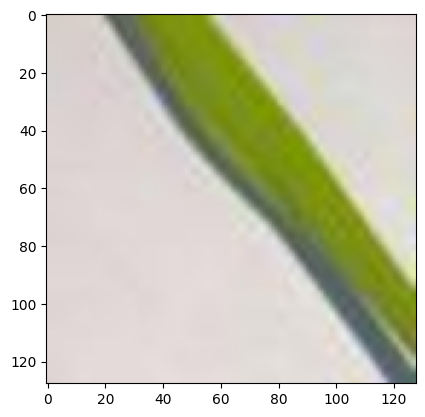

In [ ]:


plt.imshow(rgb_img)
label_map = (training_set.class_indices)

print(label_map)
img_rank4 = np.expand_dims(rgb_img/255, axis=0)


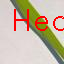

Healthy


In [ ]:
classifier.predict(img_rank4)
predict_x=classifier.predict(img_rank4) 
classes_x=np.argmax(predict_x,axis=1)
h = list(label_map.keys())[classes_x[0]]
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img, h, (10, 30), font, 1.0, (0, 0, 255), 1)
cv2_imshow(img)

print(h)

In [ ]:
import matplotlib.pyplot as plt

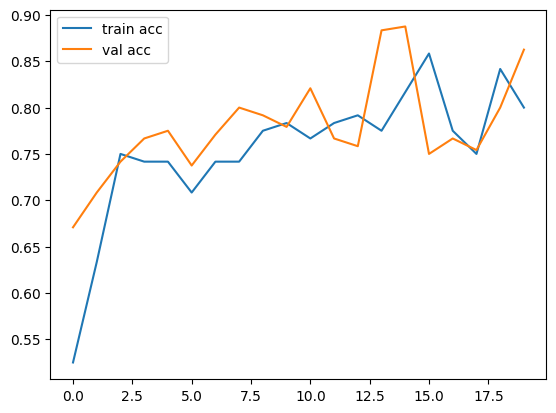

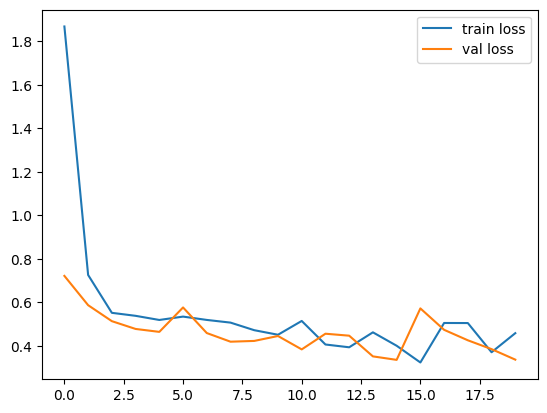

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(classifier.history.history['accuracy'], label='train acc')
plt.plot(classifier.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

plt.plot(classifier.history.history['loss'], label='train loss')
plt.plot(classifier.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
from keras.models import load_model
from sklearn.metrics import  accuracy_score

In [ ]:
model1 = load_model('/content/drive/MyDrive/final year projects/model3.h5')
model2 = load_model('/content/drive/MyDrive/final year projects/new_model_inception2.h5')

models = [model1, model2]


In [ ]:
preds = [model.predict(training_set) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

NameError: ignored

In [ ]:
ensemble_prediction = np.argmax(summed, axis=1)


In [ ]:
prediction1 = model1.predict_classes(training_set)
prediction2 = model2.predict_classes(training_set)

In [ ]:

accuracy1 = accuracy_score(valid_set, prediction1)
accuracy2 = accuracy_score(valid_set, prediction2)
ensemble_accuracy = accuracy_score(valid_set, ensemble_prediction)

In [ ]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

In [ ]:
models = [model1, model2]
preds = [model.predict(training_set) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]


In [ ]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(valid_set, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)
